Tabular Algorithms

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

## Functions

In [ ]:
def calculate_action_probability(state):
  exponentiated_potential = np.exp(-theta[state[0]][state[1]])
  action_probability = 1/(exponentiated_potential+1)
  return action_probability

In [ ]:
def transition(state, action_probability):
  rand = np.random.random()
  if rand < action_probability:
    action = 1
  else:
    action = 0
  return action

In [ ]:
def update_state(state, action):
  state[0] += 2*action - 1
  state[1] += 1
  return state

In [ ]:
def generate_reward(state):
  if state[0] < 0:
    reward = -1 * abs(state[0])
  else:
    reward = 0
  if state[1] == 20:
    reward -=  2 * abs(state[0])
  return reward

In [ ]:
def calculate_eligibility(state, action, action_probability):
  if action == 1:
    eligibility = 1 - action_probability
  else:
    eligibility = -action_probability
  return eligibility

In [ ]:
def update_theta1(trajectory, actions, rewards, eligibilities, theta): #monte-carlo and value-baseline
  for i in reversed(range(len(trajectory)-1)):
    state = trajectory[i]
    action = actions[i]
    eligibility = eligibilities[i]
    sum_of_rewards = sum(rewards[i:T]) 
    theta[state[0]][state[1]] += learning_rate * sum_of_rewards * eligibility
  return theta

In [ ]:
def update_theta2(state, next_state, reward, learning_rate, eligibility): #actor-critic
  past_value = find_value(state)
  current_value = find_value(next_state)
  td_error = current_value + reward - past_value
  theta[state[0]][state[1]] += learning_rate * td_error * eligibility
  return theta

In [ ]:
def find_value(state):
  return value_table[state[0]][state[1]]

In [ ]:
def update_value1(trajectory, rewards, learning_rate_beta, value_table): #value-baseline
  for i in reversed(range(len(trajectory)-1)):
    state = trajectory[i]
    current_value = find_value(state)
    sum_of_rewards = sum(rewards[i:T])
    td_error = sum_of_rewards - current_value
    value_table[state[0]][state[1]] += learning_rate_beta * td_error
  return value_table

In [ ]:
def update_value2(state, next_state, reward, learning_rate_beta): #actor-critic
  past_value = find_value(state)
  current_value = find_value(next_state)
  td_error = current_value + reward - past_value
  value_table[state[0]][state[1]] += learning_rate_beta * td_error
  return value_table

In [ ]:
def generate_samples(N):
  trajectories = []
  average_return = 0
  for i in range(0, N):
    state = [0,0]
    trajectory = [state.copy()]
    trajectory_reward = 0
    for i in range (0,T):
      action_probability = calculate_action_probability(state.copy())
      action = transition(state.copy(), action_probability)
      next_state = update_state(state.copy(), action)
      reward = generate_reward(next_state.copy())
      trajectory_reward += reward
      state = next_state
      trajectory.append(state.copy())
    trajectories.append(trajectory.copy())
    average_return += (trajectory_reward - average_return)/(i+1)
  return trajectories, average_return

##Algorithms

###Monte-Carlo

In [ ]:
def monte_carlo(N, avg):
  trajectories = []
  trajectory_rewards = [] #stores trajectory rewards
  running_average_return = []
  for i in range(0, N):
    state = [0,0]
    trajectory = [state.copy()]
    actions = []
    rewards = []
    eligibilities = []
    action_probabilities = []
    trajectory_reward = 0
    for i in range (0,T):

      action_probability = calculate_action_probability(state.copy())
      action_probabilities.append(action_probability) #store action probabilities

      action = transition(state.copy(), action_probability)
      actions.append(action) #store actions

      eligibility = calculate_eligibility(state.copy(), action, action_probability)
      eligibilities.append(eligibility) #store eligibilities
      
      next_state = update_state(state.copy(), action)
  
      reward = generate_reward(next_state.copy())
      rewards.append(reward) #store rewards

      trajectory_reward += reward

      state = next_state #set next state as state
      trajectory.append(state.copy()) #add next state to trajectory

    trajectories.append(trajectory.copy()) #append trajectory to global list
    trajectory_rewards.append(trajectory_reward) # append reward for trajectory

    #average_return
    avg += return_learning_rate * (trajectory_reward - avg)
    running_average_return.append(avg)
    
    update_theta1(trajectory, actions, rewards, eligibilities, theta) #update theta

  return trajectory_rewards, running_average_return

###Value-Baseline

In [ ]:
def value_baseline(N, avg):
  trajectories = []
  trajectory_rewards = [] #stores trajectory rewards
  running_average_return = [] #store running average return
  for i in range(0, N):
    state = [0,0]
    trajectory = [state.copy()]
    actions = []
    rewards = []
    eligibilities = []
    action_probabilities = []
    trajectory_reward = 0
    for i in range (0,T):

      action_probability = calculate_action_probability(state.copy())
      action_probabilities.append(action_probability) #store action probabilities

      action = transition(state.copy(), action_probability)
      actions.append(action) #store actions

      eligibility = calculate_eligibility(state.copy(), action, action_probability)
      eligibilities.append(eligibility) #store eligibilities
      
      next_state = update_state(state.copy(), action)
  
      reward = generate_reward(next_state.copy())
      rewards.append(reward) #store rewards

      trajectory_reward += reward

      state = next_state #set next state as state
      trajectory.append(state.copy()) #add next state to trajectory

    trajectories.append(trajectory.copy()) #append trajectory to global list
    trajectory_rewards.append(trajectory_reward) # append reward for trajectory

    #update the value for past state
    update_value1(trajectory, rewards, learning_rate_beta, value_table)

    #update theta
    update_theta1(trajectory, actions, rewards, eligibilities, theta)

    #average_return = (trajectory_reward/T)
    avg += return_learning_rate * (trajectory_reward - avg)
    running_average_return.append(avg)

  return trajectory_rewards, running_average_return

###Actor-Critic

In [ ]:
def actor_critic(N, avg):
  trajectories = []
  trajectory_rewards = [] #stores trajectory rewards
  running_average_return = [] #store running average return
  for i in range(0, N):
    state = [0,0]
    trajectory = [state.copy()]
    actions = []
    rewards = []
    eligibilities = []
    action_probabilities = []
    trajectory_reward = 0
    for i in range (0,T):

      action_probability = calculate_action_probability(state.copy())
      action_probabilities.append(action_probability) #store action probabilities

      action = transition(state.copy(), action_probability)
      actions.append(action) #store actions

      eligibility = calculate_eligibility(state.copy(), action, action_probability)
      eligibilities.append(eligibility) #store eligibilities
      
      next_state = update_state(state.copy(), action)
  
      reward = generate_reward(next_state.copy())
      rewards.append(reward) #store rewards

      trajectory_reward += reward

      #update the value for past state
      update_value2(state, next_state, reward, learning_rate_beta)

      #update theta
      update_theta2(state, next_state, reward, learning_rate, eligibility)

      state = next_state #set next state as state
      trajectory.append(state.copy()) #add next state to trajectory

    trajectories.append(trajectory.copy()) #append trajectory to global list
    trajectory_rewards.append(trajectory_reward) # append reward for trajectory

    #average_return
    avg += return_learning_rate * (trajectory_reward - avg)
    running_average_return.append(avg)

  return trajectory_rewards, running_average_return

##Untrained

In [ ]:
T = 20
dimensions = (2*T+1,T+1)
theta = np.zeros(dimensions)

In [ ]:
untrained, avg = generate_samples(30)

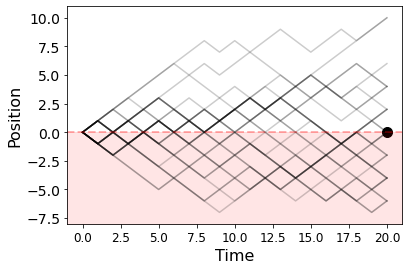

Average return: -25.04324783787569


In [ ]:
min_y = np.min(np.array(untrained)[:,:,0]) - 1
max_y = np.max(np.array(untrained)[:,:,0]) + 1

plt.plot(np.array(untrained)[:,:,0].T, c = 'k', alpha = 0.2)
plt.scatter([20], [0], c = 'k', marker = 'o', s = 100)
plt.plot([-1, 21], [0, 0], lw = 2, c = 'r', ls = '--', alpha = 0.3)
plt.fill_between([-1, 21], [0, 0], [min_y, min_y], color = 'r', alpha = 0.1)
plt.xlim(-1, 21)
plt.ylim(min_y, max_y)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Position", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

print("Average return:", avg)

## Train algorithms

###Train monte-carlo

In [ ]:
T = 20
N = 1000
dimensions = (2*T+1,T+1)
theta = np.zeros(dimensions)
value_table = np.zeros(dimensions)
learning_rate = 0.15
learning_rate_beta = 0.6
return_learning_rate = 0.1

In [ ]:
mc_rewards, mc_running_return = monte_carlo(N, avg)

###Train value-baseline

In [ ]:
T = 20
N = 1000
dimensions = (2*T+1,T+1)
theta = np.zeros(dimensions)
value_table = np.zeros(dimensions)
learning_rate = 0.15
learning_rate_beta = 0.6
return_learning_rate = 0.1

In [ ]:
vb_rewards, vb_running_return = value_baseline(N, avg)

###Train actor-critic

In [ ]:
T = 20
N = 1000
dimensions = (2*T+1,T+1)
theta = np.zeros(dimensions)
value_table = np.zeros(dimensions)
learning_rate = 0.15
learning_rate_beta = 0.6
return_learning_rate = 0.1

In [ ]:
ac_rewards, ac_running_return = actor_critic(N, avg)

Plot returns

Text(0, 0.5, 'Episodic returns')

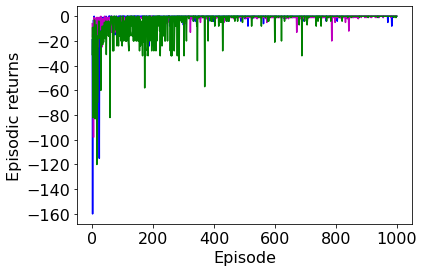

In [ ]:
plt.plot(mc_rewards, c = 'b')
plt.plot(vb_rewards, c = 'm')
plt.plot(ac_rewards, c = 'g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Episodic returns", fontsize=16)

Plot running returns

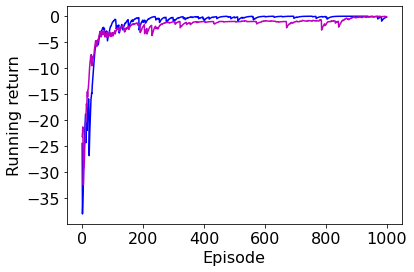

In [ ]:
plt.plot(mc_running_return, c = 'b')
plt.plot(vb_running_return, c = 'm')
#plt.plot(ac_running_return, c = 'g')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Running return", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Plot all excursions